# Cost of health insurance solution

## üìù Instructions

### Predicting the cost of health insurance for a person

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `medical_insurance_cost.csv`. You can load it into the code directly from the link:

```text
https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv
```

Or download it and add it by hand in your repository. In this dataset, you will find the following variables:

1. `age`. Age of primary beneficiary (numeric)
2. `sex`. Gender of the primary beneficiary (categorical)
3. `bmi`. Body mass index (numeric)
4. `children`. Number of children/dependents covered by health insurance (numeric)
5. `smoker`. Is the person a smoker? (categorical)
6. `region`. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. `charges`. Health insurance premium (numerical)

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.

#### Step 3: Build a linear regression model

You do not need to optimize the hyperparameters. Start by using a default definition, and improve it in the next step.

#### Step 4: Optimize the previous model

After training the model, if the results are not satisfactory, optimize it if possible.

In [2]:
# IMPORTO LIBRERIAS:

import pandas as pd


In [7]:
# DEFINIMOS LAS FUNCIONES NECESARIAS

# üìåüìåüìå count_nan_zeros_uniques üìåüìåüìå
# Se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.

def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

In [4]:
# LOADING DATASET:

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


In [5]:
# OVERVIEW DEL DATASET ‚Üí sample

df_raw.sample(10,random_state=2025)

age     sex     bmi  children smoker     region      charges
1269   45    male  27.500         3     no  southwest   8615.30000
942    18  female  40.185         0     no  northeast   2217.46915
1240   52    male  41.800         2    yes  southeast  47269.85400
1229   58    male  30.305         0     no  northeast  11938.25595
272    41    male  37.050         2     no  northwest   7265.70250
738    23    male  31.730         3    yes  northeast  36189.10170
1105   54  female  31.240         0     no  southeast  10338.93160
1182   25  female  30.300         0     no  southwest   2632.99200
14     27    male  42.130         0    yes  southeast  39611.75770
596    42  female  29.480         2     no  southeast   7640.30920

In [6]:
# OVERVIEW DEL DATASET ‚Üí .info()

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# OVERVIEW DEL DATASET  ‚Üí count_nan_zeros_uniques(df)

count_nan_zeros_uniques(df_raw)

NaNs  Zeros  Uniques
age          0      0       47
sex          0      0        2
bmi          0      0      548
children     0    574        6
smoker       0      0        2
region       0      0        4
charges      0      0     1337

In [ ]:
# GENERO df_baking 
# Defino cuales son las transformaciones necesarias, 
# y genero una copia del dataframe original (raw), 
# llamado df_baking para aplicarlas alli.

df_baking = df_raw.copy()

## Express EDA

This solution does not go deep into EDA, but includes the minimum code to process the data before modeling.

In [ ]:
# Transformacion 1:
# Eliminar filas duplicadas del DataFrame, si existen
# Esto ayuda a mantener datos √∫nicos y limpios.
# Luego, se reinicia el √≠ndice para que quede consecutivo y sin huecos.
df_baking = df_baking.drop_duplicates().reset_index(drop=True)

age     sex     bmi  children smoker     region      charges
1087   52    male  47.740         1     no  southeast   9748.91060
941    18  female  40.185         0     no  northeast   2217.46915
932    45  female  35.300         0     no  southwest   7348.14200
1228   58    male  30.305         0     no  northeast  11938.25595
272    41    male  37.050         2     no  northwest   7265.70250
738    29    male  35.500         2    yes  southwest  44585.45587
1104   54  female  31.240         0     no  southeast  10338.93160
1181   25  female  30.300         0     no  southwest   2632.99200
14     27    male  42.130         0    yes  southeast  39611.75770
596    34  female  33.250         1     no  northeast   5594.84550

In [12]:
# Mostrar 10 filas seleccionadas aleatoriamente del DataFrame
# Se usa random_state=2025 para garantizar que el resultado sea reproducible
df_baking.sample(10, random_state=2025)

age     sex     bmi  children smoker     region      charges
1087   52    male  47.740         1     no  southeast   9748.91060
941    18  female  40.185         0     no  northeast   2217.46915
932    45  female  35.300         0     no  southwest   7348.14200
1228   58    male  30.305         0     no  northeast  11938.25595
272    41    male  37.050         2     no  northwest   7265.70250
738    29    male  35.500         2    yes  southwest  44585.45587
1104   54  female  31.240         0     no  southeast  10338.93160
1181   25  female  30.300         0     no  southwest   2632.99200
14     27    male  42.130         0    yes  southeast  39611.75770
596    34  female  33.250         1     no  northeast   5594.84550

In [13]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [15]:
# GENERAMOS EL DATAFRAME DEFINITIVO SOBRE EL QUE APLICAREMOS EL ANALISIS: df
df = df_baking.copy()

In [16]:
from sklearn.preprocessing import MinMaxScaler

# =============================================
# üí° ¬øQu√© hace MinMaxScaler y por qu√© usarlo?
# =============================================
# MinMaxScaler es una herramienta de preprocesamiento de sklearn que normaliza 
# los valores num√©ricos para que est√©n en un rango entre 0 y 1.
# Esto es √∫til para modelos de machine learning que son sensibles a la escala 
# de los datos (por ejemplo: KNN, SVM, redes neuronales).
# Al escalar los datos, se mejora la eficiencia del entrenamiento 
# y se evita que una variable con valores grandes domine sobre otras.

# Paso 1: Codificar variables categ√≥ricas como num√©ricas
#         Se utiliza pd.factorize para convertir texto en valores num√©ricos √∫nicos.
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

# Paso 2: Definir las variables num√©ricas que ser√°n escaladas
#         Incluye tanto variables originales como las codificadas.
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

# Paso 3: Crear un objeto MinMaxScaler para escalar los datos entre 0 y 1
scaler = MinMaxScaler()

# Paso 4: Ajustar el escalador a los datos y transformarlos
scal_features = scaler.fit_transform(df[num_variables])

# Paso 5: Crear un nuevo DataFrame con los datos escalados,
#         conservando el mismo √≠ndice y los nombres de columnas.
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Paso 6: Mostrar las primeras 5 filas del DataFrame escalado
df_scal.head()

age       bmi  children  sex_n  smoker_n  region_n   charges
0  0.021739  0.321227       0.0    0.0       0.0  0.000000  0.251611
1  0.000000  0.479150       0.2    1.0       1.0  0.333333  0.009636
2  0.217391  0.458434       0.6    1.0       1.0  0.333333  0.053115
3  0.326087  0.181464       0.0    1.0       1.0  0.666667  0.333010
4  0.304348  0.347592       0.0    1.0       1.0  0.666667  0.043816

In [ ]:
# ==================================================
# üîç Selecci√≥n de Caracter√≠sticas con SelectKBest
# ==================================================
# Se utiliza SelectKBest del m√≥dulo sklearn.feature_selection
# para elegir las variables independientes (features) m√°s relevantes.
# En este caso, se usa f_regression, que eval√∫a la relaci√≥n lineal entre cada feature y el target ('charges').
# Esto ayuda a reducir el n√∫mero de variables, eliminar ruido y mejorar el rendimiento del modelo.


from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Paso 1: Usar el DataFrame escalado y solo con variables num√©ricas
X = df_scal.drop("charges", axis=1)
y = df_scal["charges"]

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear el modelo de selecci√≥n de caracter√≠sticas para quedarnos con las 4 m√°s relevantes
selection_model = SelectKBest(f_regression, k=4)

# Paso 4: Ajustar el modelo al conjunto de entrenamiento
selection_model.fit(X_train, y_train)

# Paso 5: Obtener las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

# Paso 6: Transformar los conjuntos para quedarnos solo con esas columnas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

# Paso 7: Mostrar las primeras filas del nuevo set reducido
X_train_sel.head()


age       bmi  children  smoker_n
0  0.108696  0.230024       0.0       1.0
1  0.065217  0.263250       0.4       1.0
2  0.739130  0.580172       0.4       1.0
3  0.978261  0.686306       0.0       1.0
4  0.630435  0.286252       0.4       1.0

In [ ]:
# Paso 8: Mostrar las primeras filas del nuevo set reducido para testing
X_test_sel.head()

age       bmi  children  smoker_n
0  0.673913  0.176352       0.0       1.0
1  0.239130  0.259349       0.8       1.0
2  0.717391  0.549502       0.6       1.0
3  0.282609  0.495830       0.6       0.0
4  0.282609  0.603444       0.4       1.0

In [25]:
import os

# ================================================
# üíæ Agregar la variable objetivo y guardar los datos
# ================================================

# Paso 1: Agregar la variable objetivo ('charges') al set de entrenamiento y prueba
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

# Paso 2: Crear carpeta "../data/processed" si no existe
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)  # Crea la carpeta y evita error si ya existe

# Paso 3: Guardar los DataFrames como CSV en esa carpeta
train_path = os.path.join(output_dir, "clean_train.csv")
test_path = os.path.join(output_dir, "clean_test.csv")

X_train_sel.to_csv(train_path, index=False)
X_test_sel.to_csv(test_path, index=False)

# Paso 4: Verificar que los archivos se hayan guardado correctamente
print(f"Archivo guardado: {os.path.abspath(train_path)} - {'Existe ‚úÖ' if os.path.exists(train_path) else 'No encontrado ‚ùå'}")
print(f"Archivo guardado: {os.path.abspath(test_path)} - {'Existe ‚úÖ' if os.path.exists(test_path) else 'No encontrado ‚ùå'}")



Archivo guardado: /workspaces/data/processed/clean_train.csv - Existe ‚úÖ
Archivo guardado: /workspaces/data/processed/clean_test.csv - Existe ‚úÖ


## Linear Regression model

In [7]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

age       bmi  children  smoker_n   charges
0  0.108696  0.230024       0.0       1.0  0.020339
1  0.065217  0.263250       0.4       1.0  0.034446
2  0.739130  0.580172       0.4       1.0  0.516374
3  0.978261  0.686306       0.0       1.0  0.196070
4  0.630435  0.286252       0.4       1.0  0.137177

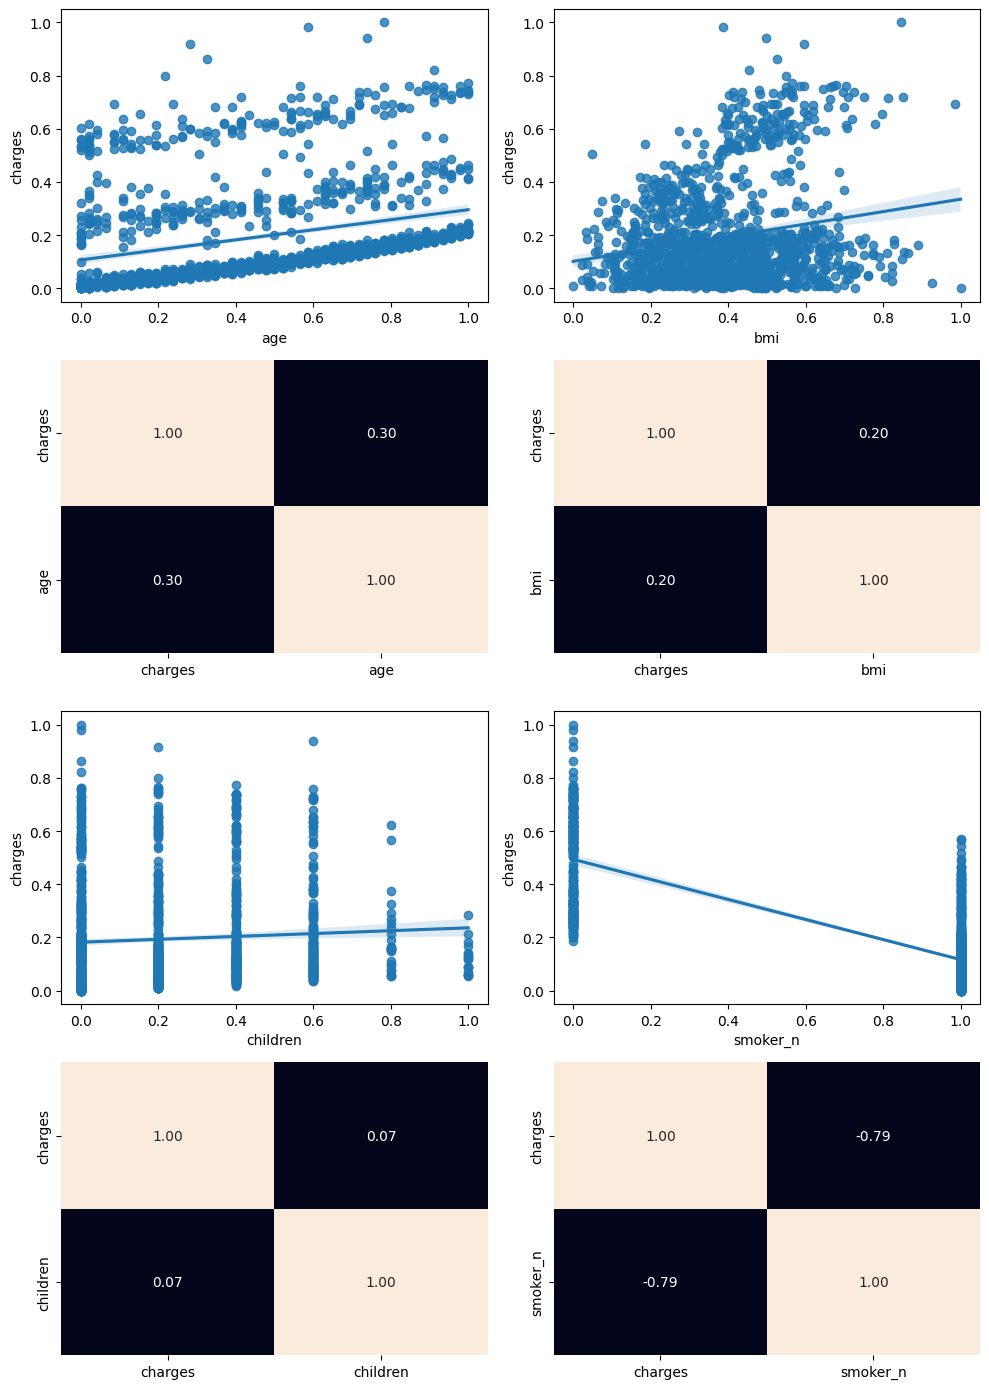

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [9]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.009150574110332004
R2 Score: 0.8045531086669286


A Linear Regression model does not have hyperparameters to optimize. We must use another model to perform improvements like a regularized model. We will study more about this in the next module.